In [1]:
import pandas as pd
import random
import numpy as np
from pprint import pprint

In [ ]:
def entropy(target):
    elements,counts = np.unique(target,returnc = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [ ]:
def Information-gain(data,attribute_name,target_name="target"):
    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[attribute_name],returnc=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [ ]:
def id3(data,raw-data,features,target_attribute_name="target",parent_node_class = None):
    
    #Define the stopping criteria --> If one of this is satisfied, we want to return a leaf node#
    
    #If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    #If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data)==0:
        return np.unique(raw-data[target_attribute_name])[np.argmax(np.unique(raw-data[target_attribute_name],returnc=True)[1])]
    
    #If the feature space is empty, return the mode target feature value of the direct parent node --> Note that
    #the direct parent node is that node which has called the current run of the id3 algorithm and hence
    #the mode target feature value is stored in the parent_node_class variable.
    
    elif len(features) ==0:
        return parent_node_class
    
    #If none of the above holds true, grow the tree!
    
    else:
        #Set the default value for this node --> The mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],returnc=True)[1])]
        
        #Select the feature which best splits the dataset
        item_values = [Information-gain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        #Create the tree structure. The root gets the name of the feature (best_feature) with the maximum information
        #gain in the first run
        tree = {best_feature:{}}
        
        
        #Remove the feature with the best inforamtion gain from the feature space
        features = [i for i in features if i != best_feature]
        
        #Grow a branch under the root node for each possible value of the root node feature
        
        for value in np.unique(data[best_feature]):
            value = value
            #Split the dataset along the value of the feature with the largest information gain and therwith create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()
            
            #Call the id3 algorithm for each of those sub_datasets with the new parameters --> Here the recursion comes in!
            subtree = id3(sub_data,ds,features,target_attribute_name,parent_node_class)
            
            #Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree
            
        return(tree)    

In [ ]:
def predict(queue,tree,default = 1):
 for key in list(queue.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][queue[key]] 
            except:
                return default
  
            #3.
            result = tree[key][queue[key]]
            #4.
            if isinstance(result,dict):
                return predict(queue,result)

            else:
                return result


In [ ]:
filename = "train.csv"
#n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
#s = 6000 #desired sample size
ds = pd.read_csv(filename)
#ds = ds.sample(frac=1)
ds.head
#skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
#df = pd.read_csv(ds, skiprows=skip)
#df


<bound method NDFrame.head of      target          workclass      education  ...    race      sex  native-country
0     <=50K          State-gov      Bachelors  ...   White     Male   United-States
1     <=50K   Self-emp-not-inc      Bachelors  ...   White     Male   United-States
2     <=50K            Private        HS-grad  ...   White     Male   United-States
3     <=50K            Private           11th  ...   Black     Male   United-States
4     <=50K            Private      Bachelors  ...   Black   Female            Cuba
...     ...                ...            ...  ...     ...      ...             ...
9995   >50K        Federal-gov   Some-college  ...   White     Male   United-States
9996  <=50K            Private   Some-college  ...   Black   Female   United-States
9997  <=50K            Private   Some-college  ...   White     Male   United-States
9998  <=50K            Private        HS-grad  ...   White     Male   United-States
9999  <=50K   Self-emp-not-inc   Some-college 

In [ ]:

training_data = ds
validateing_data = pd.read_csv("adult.validate.10k.csv") 

def validate(data,tree):
    #Create new queue instances by simply removing the target feature column from the original dataset and 
    #convert it to a dictionary
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    #Create a empty DataFrame in whose columns the prediction of the tree are stored
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    #Calculate the prediction accuracy
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["target"])/len(data))*100,'%')
    



In [ ]:
tree = id3(ds,ds,ds.columns[1:])
pprint(tree)
validate(validateing_data,tree)

{'relationship': {' Husband': {'education': {' 10th': {'occupation': {' Adm-clerical': '<=50K',
                                                                      ' Craft-repair': {'workclass': {' Private': {'race': {' Asian-Pac-Islander': '<=50K',
                                                                                                                            ' Black': {'marital-status': {' Married-civ-spouse': {'sex': {' Male': {'native-country': {' United-States': '<=50K'}}}}}},
                                                                                                                            ' White': {'marital-status': {' Married-civ-spouse': {'sex': {' Male': {'native-country': {' United-States': '<=50K'}}}}}}}},
                                                                                                      ' Self-emp-not-inc': '<=50K'}},
                                                                      ' Exec-managerial': {'workclass': {' Local-gov

In [ ]:
tree.dept

In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('train.csv')
X,y = data[[ 'workclass',  'education', 'marital-status', 'occupation','relationship',  'race','sex','native-country']],data['target']
X,y = X.fillna(0),y.fillna(0)
X = pd.get_dummies(X)    # random_state=1
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.25,shuffle = True)


In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_predicted = model.predict(X_validate)
print('Training accuracy: ',model.score(X_train,y_train))
print('validation Accuracy: ',model.score(X_validate,y_validate))

Training accuracy:  0.8792
validation Accuracy:  0.8048


In [ ]:
path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

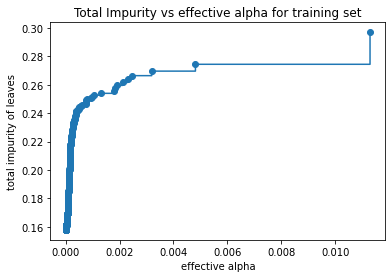

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  if(ccp_alpha >= 0):
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06853632170584523 and a depth of: 0


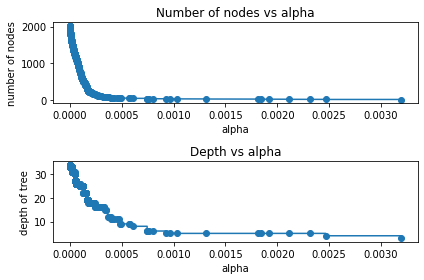

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[:-1], node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[:-1], depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

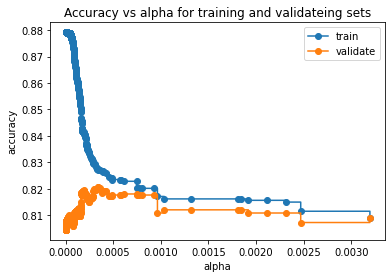

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
validate_scores = [clf.score(X_validate, y_validate) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validateing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], validate_scores, marker='o', label="validate",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(validate_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('validate accuracy of best model: ',best_model.score(X_validate, y_validate))

Training accuracy of best model:  0.8273333333333334
validate accuracy of best model:  0.8208


**2-b :**

In [4]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [ ]:
data = pandas.read_csv('train.csv')
test = pandas.read_csv('adult.test.10k.csv')
X_tst,y_tst = test[[ 'workclass',  'education', 'marital-status', 'occupation','relationship',  'race','sex','native-country']],test['target']
X,y = data[[ 'workclass',  'education', 'marital-status', 'occupation','relationship',  'race','sex','native-country']],data['target']
X,y = X.fillna(0),y.fillna(0)
X_tst,y_tst = X_tst.fillna(0),y_tst.fillna(0)
X = pandas.get_dummies(X)  
y = pandas.get_dummies(y)
X_tst = pandas.get_dummies(X_tst)  
y_tst = pandas.get_dummies(y_tst)

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_tst = scaler.fit_transform(X_tst)

In [ ]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=4, shuffle=False)

best_svr.fit(X,y[">50K"])
scores.append(best_svr.score(X_test, y_test[">50K"]))

In [ ]:
y_test.head

In [ ]:
print(np.mean(scores))

0.35634352186916785


In [ ]:
data = pd.read_csv('train.csv')
X,y = data[[ 'workclass',  'education', 'marital-status', 'occupation','relationship',  'race','sex','native-country']],data['target']
X,y = X.fillna(0),y.fillna(0)
X = pd.get_dummies(X)    # random_state=1
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.25,shuffle = False)


In [ ]:
y_validate.head

In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_predicted = model.predict(X_validate)
print('Training accuracy: ',model.score(X_train,y_train))
print('validation Accuracy: ',model.score(X_validate,y_validate))

Training accuracy:  0.8778666666666667
validation Accuracy:  0.8076


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

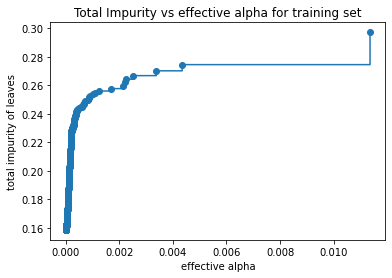

In [ ]:
path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  if(ccp_alpha >= 0):
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [ ]:
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07509603495255068 and a depth of: 0


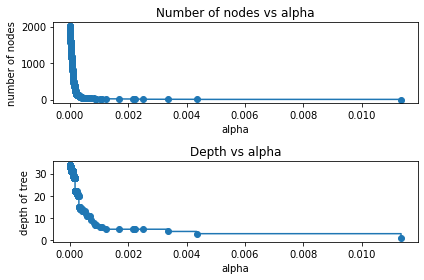

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

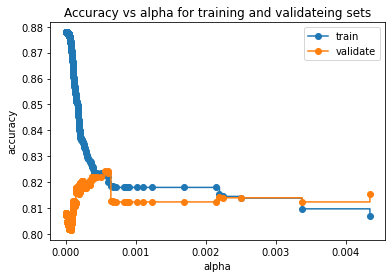

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
validate_scores = [clf.score(X_validate, y_validate) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validateing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, validate_scores, marker='o', label="validate",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(validate_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('validate accuracy of best model: ',best_model.score(X_validate, y_validate))

Training accuracy of best model:  0.8226666666666667
validate accuracy of best model:  0.8244


2-b - 2

In [5]:
ds = pd.read_csv('train.csv')
#ds = ds.sample(frac=1).reset_index(drop=True)
#a = pd.get_dummies(ds['target'], prefix = "target")

#frames = [ds, a]
#ds = pd.concat(frames, axis = 1)
#ds = ds.drop(columns=['price_range'])
y = np.array(ds['target'])
y = y[:, np.newaxis]
ds = ds.drop(columns=['target'])
x = np.array(ds)
X_test = x[2500:5000, :]
Y_test = y[2500:5000, :]
X_train =ds.drop(ds.index[2500:5000])# x[:2499, :] +  x[5001:, :]    #np.delete(x, range(2500,5000))
Y_train = np.delete(y, range(2500,5000))

#Y_train = y.drop(y.index[2499:])


In [6]:
X_validate=pd.DataFrame(X_test)
X_validate = pd.get_dummies(X_validate)  
y_validate=pd.DataFrame(Y_test)
y_validate = pd.get_dummies(y_validate)  
X_train=pd.DataFrame(X_train)
X_train = pd.get_dummies(X_train)  
Y_train=pd.DataFrame(Y_train)
Y_train = pd.get_dummies(Y_train)  
X_validate,y_validate , X_train , Y_train = X_validate.fillna(0),y_validate.fillna(0),X_train.fillna(0) ,Y_train.fillna(0)

In [7]:
y_validate= y_validate.iloc[:, :-1]
Y_train= Y_train.iloc[:, :-1]
X_train= X_train.iloc[:, :-6]
X_train.shape

(7500, 91)

In [ ]:
y_validate.head

In [ ]:
print(X_validate.shape ,y_validate.shape ,X_train.shape ,Y_train.shape )

(2500, 91) (2500, 1) (7500, 91) (7500, 1)


In [ ]:
X_validate=np.argmax(X_validate, axis=1)
y_validate=np.argmax(y_validate, axis=1)

Training accuracy:  0.8785333333333334


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

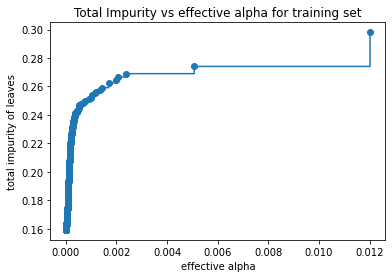

In [11]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,Y_train)
y_predicted = model.predict(X_validate)
print('Training accuracy: ',model.score(X_train,Y_train))
#print('validation Accuracy: ',model.score(X_validate,y_validate))

path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  if(ccp_alpha >= 0):
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.029589701369016785 and a depth of: 0


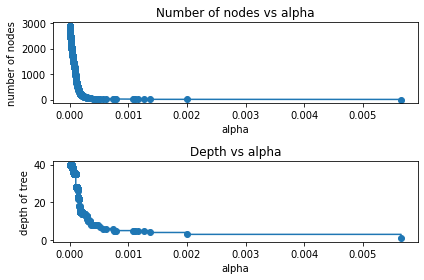

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

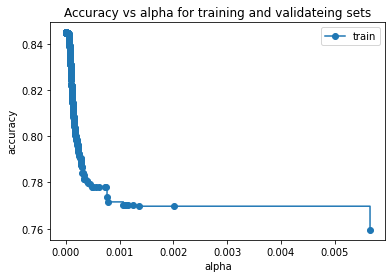

Training accuracy of best model:  0.8278666666666666


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
#validate_scores = [clf.score(int(X_validate),int(y_validate)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validateing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker='o', label="train",
        drawstyle="steps-post")
#ax.plot(ccp_alphas, validate_scores, marker='o', label="validate",
 #       drawstyle="steps-post")
ax.legend()
plt.show()

index_best_model = np.argmax(validate_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
#print('validate accuracy of best model: ',best_model.score(X_validate, y_validate))

2-b - 3

In [ ]:
ds = pd.read_csv('train.csv')
y = np.array(ds['target'])
y = y[:, np.newaxis]
ds = ds.drop(columns=['target'])
x = np.array(ds)
X_test = x[5000:7500, :]
Y_test = y[5000:7500, :]
X_train =ds.drop(ds.index[5000:7500])
Y_train = np.delete(y, range(5000,7500))

X_validate=pd.DataFrame(X_test)
X_validate = pd.get_dummies(X_validate)  
y_validate=pd.DataFrame(Y_test)
y_validate = pd.get_dummies(y_validate)  
X_train=pd.DataFrame(X_train)
X_train = pd.get_dummies(X_train)  
Y_train=pd.DataFrame(Y_train)
Y_train = pd.get_dummies(Y_train)  

In [ ]:
y_validate= y_validate.iloc[:, :-1]
Y_train= Y_train.iloc[:, :-1]
X_train= X_train.iloc[:, :-6]
X_train.shape

(7500, 91)

In [ ]:
print(X_validate.shape ,y_validate.shape ,X_train.shape ,Y_train.shape )

(2500, 91) (2500, 1) (7500, 91) (7500, 1)


Training accuracy:  0.8301333333333333


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

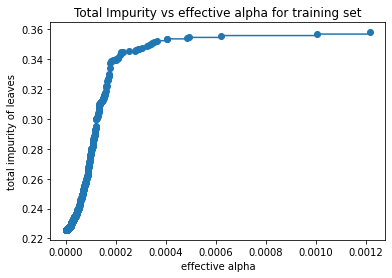

In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_predicted = model.predict(X_validate)
print('Training accuracy: ',model.score(X_train,y_train))
#print('validation Accuracy: ',model.score(X_validate,y_validate))

path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  if(ccp_alpha >= 0):
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.007315531766586558 and a depth of: 0


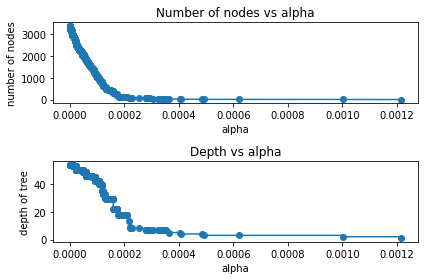

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

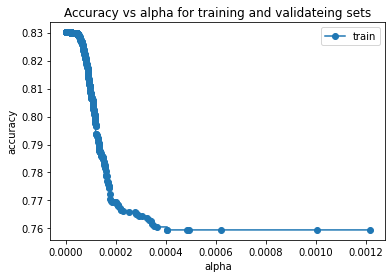

Training accuracy of best model:  0.826


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
#validate_scores = [clf.score(int(X_validate),int(y_validate)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validateing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
#ax.plot(ccp_alphas, validate_scores, marker='o', label="validate",
 #       drawstyle="steps-post")
ax.legend()
plt.show()

index_best_model = np.argmax(validate_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
#print('validate accuracy of best model: ',best_model.score(X_validate, y_validate))

2-b - 4

In [ ]:
ds = pd.read_csv('train.csv')
y = np.array(ds['target'])
y = y[:, np.newaxis]
ds = ds.drop(columns=['target'])
x = np.array(ds)
X_test = x[7500:, :]
Y_test = y[7500:, :]
X_train =ds.drop(ds.index[7500:])
Y_train = np.delete(y, range(7500,10000))

X_validate=pd.DataFrame(X_test)
X_validate = pd.get_dummies(X_validate)  
y_validate=pd.DataFrame(Y_test)
y_validate = pd.get_dummies(y_validate)  
X_train=pd.DataFrame(X_train)
X_train = pd.get_dummies(X_train)  
Y_train=pd.DataFrame(Y_train)
Y_train = pd.get_dummies(Y_train)  
#_, X_test, _, y_test = train_test_split(X_test, y_test, test_size=1,shuffle = False)

In [ ]:
y_validate= y_validate.iloc[:, :-1]
Y_train= Y_train.iloc[:, :-1]
X_train= X_train.iloc[:, :-5]
X_train.shape

(7500, 91)

In [ ]:
print(X_validate.shape ,y_validate.shape ,X_train.shape ,Y_train.shape )

(2500, 91) (2500, 1) (7500, 91) (7500, 1)


Training accuracy:  0.8352


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

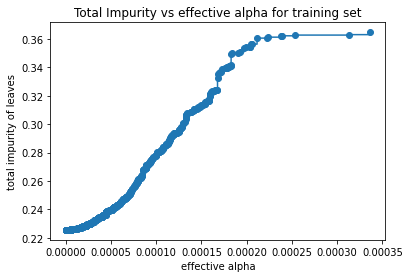

In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_predicted = model.predict(X_validate)
print('Training accuracy: ',model.score(X_train,y_train))
#print('validation Accuracy: ',model.score(X_validate,y_validate))

path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  if(ccp_alpha >= 0):
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.00038909173691786814 and a depth of: 0


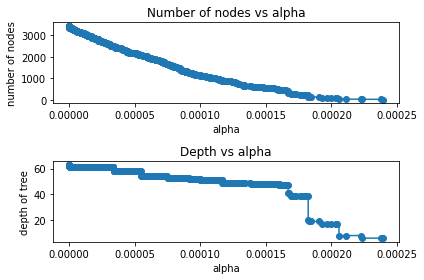

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[:-1], node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[:-1], depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

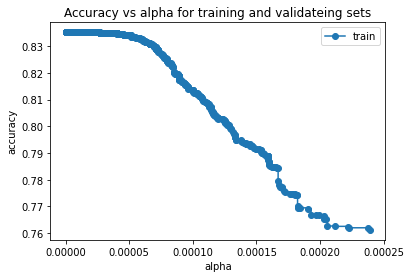

Training accuracy of best model:  0.8308


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
#validate_scores = [clf.score(int(X_validate),int(y_validate)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validateing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker='o', label="train",
        drawstyle="steps-post")
#ax.plot(ccp_alphas, validate_scores, marker='o', label="validate",
 #       drawstyle="steps-post")
ax.legend()
plt.show()

index_best_model = np.argmax(validate_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
#print('validate accuracy of best model: ',best_model.score(X_validate, y_validate))

**2-c**

In [ ]:
data = pd.read_csv('train.csv')
test = pd.read_csv('adult.test.10k.csv')
test = test.sample(frac=0.25)
X,y = data[[ 'workclass',  'education', 'marital-status', 'occupation','relationship',  'race','sex','native-country']],data['target']
X_test,y_test = test[[ 'workclass',  'education', 'marital-status', 'occupation','relationship',  'race','sex','native-country']],test['target']
X,y = X.fillna(0),y.fillna(0)
X = pd.get_dummies(X)    
_, X_test, _, y_test = train_test_split(X_test, y_test, test_size=0.25,shuffle = True)


In [ ]:
y_test.head

In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
y_predicted = model.predict(X_validate)
print('Training accuracy: ',model.score(X_train,y_train))
print('validation Accuracy: ',model.score(X_validate,y_validate))

Training accuracy:  0.8765333333333334
validation Accuracy:  0.8164


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

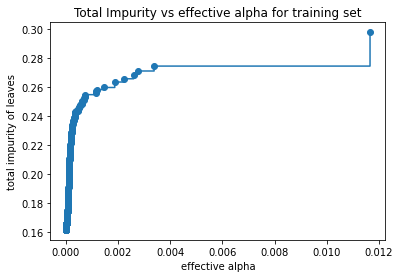

In [ ]:
path=DecisionTreeClassifier(random_state=1).\
cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
  if(ccp_alpha >= 0):
    clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0733311617719713 and a depth of: 0


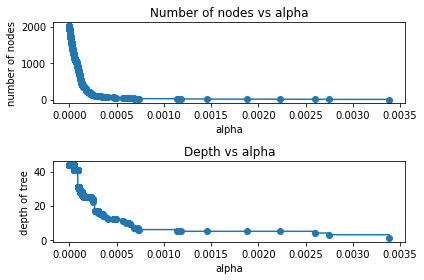

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas[:-1], node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas[:-1], depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

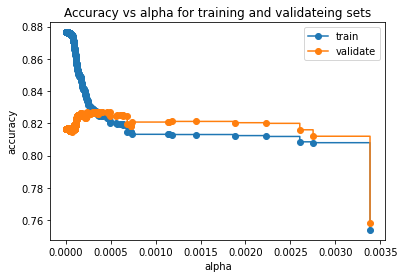

Training accuracy of best model:  0.8346666666666667
validate accuracy of best model:  0.8268


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
validate_scores = [clf.score(X_validate,y_validate) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validateing sets")
ax.plot(ccp_alphas[:-1], train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], validate_scores, marker='o', label="validate",
        drawstyle="steps-post")
ax.legend()
plt.show()

index_best_model = np.argmax(validate_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('validate accuracy of best model: ',best_model.score(X_validate, y_validate))